In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Morse oscillator ##

Let us consider the motion of a unit-mass particle in 1D moving in the potential
$$
  V(q) = D\left( 1 - e^{-\beta q} \right)^2
$$
This is a convenient interatomic interaction model for the potential energy of a diatomic molecule though for our purposes it will just be a potential worth looking at.

Let us work in units where $D=\beta=1$.

To gain some intution let us "sketch" the potential, $V(q)$.  Just from the expression above we're expecting $V(q)$ to grow rapidly as $q\to -\infty$, be kind of flat at $q\to +\infty$ and to have a minimum at $q=0$.

Text(0, 0.5, '$V(q)$')

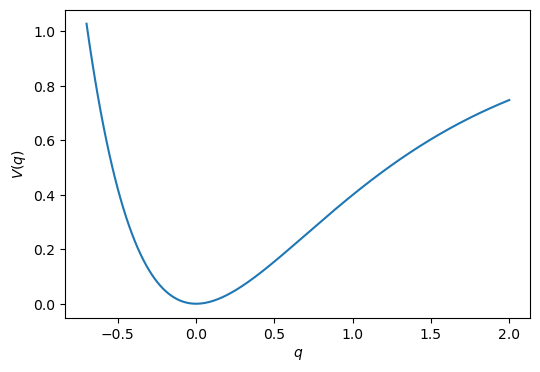

In [2]:
# Plot the potential.
fig,ax = plt.subplots(1,1,figsize=(6,4))
qq = np.linspace(-0.7,2.0,300)
Vq = (1 - np.exp(-qq))**2
ax.plot(qq,Vq,color='C0')
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$V(q)$')

(a) For energies $E<E_\star$ the trajectories are bounded.
What is $E_\star$?

### Set energy ###

From now on will we work with total energy $E_0=0.2$ (in our units where $D=\beta=1$).

(b) What is the most negative value of $q$ that the oscillator can attain for (total) energy $E_0=0.2$?

(c) Find a numerical solution to the period, $T$, of the oscillator of energy $E_0$.
You may want to consider solving the "energy equation" for $\dot{q}$ as a function of $q$ and then numerically integrating $dq/\dot{q}$ to find $T$.  You may use any integration library you like, but the inbuilt ```numpy.trapz``` routine or ```scipy.integrate.quad``` are good choices.

(d) How does this period compare to $T$ in the limit $E\to 0$?  You can and should compute $T(E\to 0)$ analytically.  Is the period for $E_0>0$ longer?  Shorter?  Why?

## Symplectic integrators ##

Let us now consider integrating the equations of motion for our system.  Off the shelf integrators (like you would find in numerical libraries like ```scipy```) would be a reasonable choice, but in fact one can do much, much better using the particular behavior of dynamical systems (a.k.a. symplectic problems or Hamiltonian flows).

One of the issues with the "standard" integrators is that they don't know about a special structure of dynamics problems (formally known as Hamiltonian evolution).  What you find is that you can get slow drifts of the energy over time, and orbits which should actually close on themselves can start to drift very far from their proper place.  We will consider this behavior elsewhere.

A class of "integrators" well suited to dynamics problems are known as symplectic integrators.

Suppose we have a single particle of position $q$, velocity $\dot{q}$ and momentum $p=m\dot{q}$ moving under a Hamiltonian, i.e. Energy$=H(q,p)=p^2/(2m) + V(q)$ with
$$
  \dot{p} = -\frac{dV}{dq}
  \quad , \quad
  \dot{q} = \frac{p}{m}
$$

Since we have a unit-mass particle, with KE $(1/2)v^2$ or $p^2/2=\dot{q}^2/2$, our equations of motion in terms of $q$ and $p=\dot{q}$ are:
$$
  \dot{q} = p
  \quad , \quad
  \dot{p} = \ddot{q} = -\frac{dV}{dq} = -2 e^{-q} \left(1-e^{-q}\right)
$$

### Stormer-Verlet

A "symplectic integrator" that tends to do reasonably well for dynamics problems is the [Stormer-Verlet method](https://en.wikipedia.org/wiki/Verlet_integration), or sometimes just the Verlet method.  Specializing to problems where $\ddot{q}=A(q)$ and we know $q$ and $\dot{q}$ at some initial time $t=t_0$, i.e. we know $q_0$ and $\dot{q}_0$ we say:

1. $q_1= q_0 + \dot{q}_0 \Delta t + \frac{1}{2} a_0 (\Delta t)^2$
2. $a_1 = A(q_1)$
3. $\dot{q}_1 = \dot{q}_0 + \frac{1}{2}\left( a_0+a_1 \right) \Delta t$
   
and so on for $q_2$, $a_2$ and $\dot{q}_2$, $q_3$, $a_3$ and $\dot{q}_3$ etc. at times $t_n=t_0+n\,\Delta t$.

(There is a "position only" version as well -- see the link above.  We derived the position-only method in the problem sets by discretizing the principle of least action, i.e. approximation the function $q(t)$ by a set of points $q_n=q(t_n)$ for times spaced by $\Delta t$.  If you like it's pretty easy to go from that to the algorithm above.)

Note that as written above this integrator is very, very similar to the [leapfrog](https://en.wikipedia.org/wiki/Leapfrog_integration) method which you may have heard of.  It's really just a question of writing the same equations in a slightly different way.

(e) Use the Verlet scheme to evolve the particle (with total energy $E_0$) from $t=0$ (where $q<0$ and $\dot{q}=0$) until $t=T$ (i.e. one period).  You should take 512 steps, with $\Delta t$ set so that the 513'th time would return you to the initial point and you should save the positions and velocities at each time step.

You should

1) Plot the trajectories (i.e. $q$ vs. $t$).
2) Plot the phase space path (i.e. $q$ vs. $\dot{q}$).
3) Plot the energy vs time.

Include the plot of energy vs. time in the solutions you hand in.

### Frequency structure ###

The orbit, $q(t)$, is a periodic function of time (with period $T$).  Thus we can decompose it in a Fourier series.  If this were a simple harmonic oscillator there would be only one frequency with non-zero amplitudes, however in our case the motion is clearly anharmonic and so we expect to see multiple frequencies.  We will use the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) to compute the frequency structure of our orbit.

Use ```numpy.fft.rfft``` to compute the FFT of the real-valued input.  A call to ```rfft``` computes:
$$
  \widetilde{q}(k) = \sum_{n=0}^{N-1} q(t_n)\ e^{-(2\pi i/N) nk}
$$
for $k=0,\cdots,N/2+1$.  Note $\widetilde{q}$ is complex -- we shall want to look at its absolute value (since we don't really care about whether we're exciting the sine or cosine component of a given frequency).  To orient yourself, make a plot of $|\widetilde{q}(k)|^2$ vs. $\omega=(2\pi/T)k$ that focuses on the lowest frequency part of the result (the first dozen or so frequencies should do).  Since there is quite a dynamic range in power, consider using a log $y$-axis

(f) How does the relative amount of power at low and high $\omega$ change with $E_0$, i.e. does it increase or decrease?

# The End